In [1]:
from brightway2 import *
from time import time

In [ ]:
bw2setup()

In [15]:
print("Default biosphere flows:", len(Database("biosphere3")))
print("Default LCIA methods:", len(methods))

Default biosphere flows: 3955
Default LCIA methods: 692


In [ ]:
ecoinvent_22 = SingleOutputEcospold1Importer(
    "/Users/cmutel/Documents/LCA Documents/Ecoinvent/2.2/processes",
    "ecoinvent 2.2"
)
ecoinvent_22.apply_strategies()
ecoinvent_22.write_database()

In [2]:
%matplotlib inline

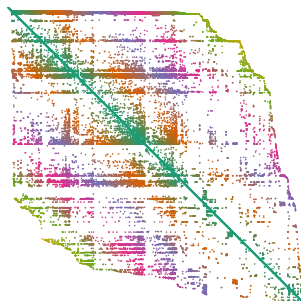

In [3]:
Database("ecoinvent 2.2").graph_technosphere()

Fast single and repeated LCA calculations

In [8]:
start = time()
activity = Database("ecoinvent 2.2").random()
method = methods.random()
lca = LCA(
    demand={activity: 1},
    method=method
)
lca.lci()
lca.lcia()
print("LCA for {}:\n\t{:.4g} {} ({})\n\t(Calculation completed in {:.2g} seconds)".format(
        activity, lca.score, methods[method]['unit'], method, time() - start)
)

LCA for 'oil boiler 100kW' (unit, CH, ['oil', 'heating systems']):
	1011 points (('ReCiPe Endpoint (E,A)', 'human health', 'human toxicity'))
	(Calculation completed in 0.91 seconds)


In [14]:
lca.lci(factorize=True)

for x in range(10):
    start = time()
    activity = Database("ecoinvent 2.2").random()
    lca.redo_lcia({activity: 1})
    print("{:.3g} seconds: {}".format(time() - start, activity))

0.0421 seconds: 'carbofuran, at regional storehouse' (kilogram, RER, ['agricultural means of production', 'pesticides'])
0.0429 seconds: 'hard coal supply mix' (kilogram, AT, ['hard coal', 'production'])
0.0437 seconds: 'disposal, bitumen, 1.4% water, to sanitary landfill' (kilogram, CH, ['waste management', 'sanitary landfill'])
0.0476 seconds: 'toner, black, used for printing' (kilogram, RER, ['electronics', 'module'])
0.0569 seconds: 'straw organic, at farm' (kilogram, CH, ['agricultural production', 'plant production'])
0.0486 seconds: 'electricity, medium voltage, at grid' (kilowatt hour, BG, ['electricity', 'supply mix'])
0.0512 seconds: 'diesel, at regional storage' (kilogram, CH, ['oil', 'fuels'])
0.0465 seconds: 'electricity, hydropower, at pumped storage power plant' (kilowatt hour, CH, ['hydro power', 'power plants'])
0.0503 seconds: 'hot impact extrusion, steel, 3 strokes' (kilogram, RER, ['metals', 'chipless shaping'])
0.0476 seconds: 'tellurium, semiconductor-grade, at pl